In [ ]:
#Linear Regression


**Problem Statement**
- Students have a study time for a certain exam, and their exam score is reflected in a two-dimensional x-y plane, with study time being an independent variable and their exam score being the dependent variable.


**Mathematical Intuition**
- We want to generate a line of best fit that predicts the exam score for a student based on the amount of effort they put into studying for the exam. Thus, we need the best "slope" and "y-intercept" for the linear equation that provides the least error.
            
            **y = mX + b**

Hence, we need an error function for the gradient descent algorithm [Which updates the weights and biases] to minimize. The error function for univariate [One independent variable] linear regression is as follows:

            E = (1/n)(nΣ_i=0(y_i - (y_hat_i))^2

This is the **Mean Squared Error** Function. We take the actual y-value for a point, subtract it from the predicted value [y_hat_i = mx_i + b], square it, sum up the differences for n number of points we have, and divide it all by the total number of points.



**Gradient Descent Optimization Algorithm**

- We need the lowest mean squared error. We can only influence the slope and y-intercept, however. We can do that by taking the partial derivative of the mean squared error cost function [Which takes in two inputs; our slope and y-intercept] with respect to slope [m] and respect to y-intercept [b] separately.

      ∂E/∂m = (1/n)(nΣ_i=0 2 * (y_i - (mx_i + b))* (-x_i))
      [Calculus Rules since m is now our independent variable]

This can be rewritten as:

           ∂E/∂m = -(2/n)(nΣ_i=0 (y_i - (mx_i + b)) * (x_i))

This is the same for b; since b is a constant, but without the x_i multiplication [Calculus rules]

           ∂E/∂b = -(2/n)(nΣ_i=0 (y_i - (mx_i + b)))


To find the best m and that minimizes error, the gradient algorithm states that we need to follow the following procedures per iteration.

            1) m = m - L(∂E/∂m)

            2) b = b - L(∂E/∂b)

We don't want to add the partial derivative term, as we want to descend and minimize the function [Hence the minus] and the learning rate determines how fast we approach the minimum. High learning rates are fast, but risky, so lower learning rates are preferred. For example, we can use a Learning Rate of α = 0.001 [Industry Standard]



100
100


<ipython-input-41-72f543a40202>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Study_Time.append(int(np.random.randint(1, 101, 1)))
<ipython-input-41-72f543a40202>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Exam_Score.append(int(np.random.randint(80, 101, 1)))
<ipython-input-41-72f543a40202>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Exam_Score.append(int(np.random.randint(40, 79, 1)))


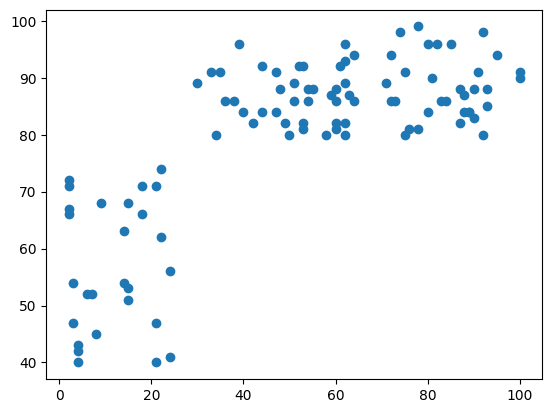

1.245889512677836 0.8744735471548085


In [ ]:
#Python Project Implementation #1: Study Time vs. Exam Score

import matplotlib.pyplot as plt #For data visualization
import numpy as np

np.random.seed(42)

Study_Time = []
for i in range (0, 100, 1):
  Study_Time.append(int(np.random.randint(1, 101, 1)))

Exam_Score = []
for i in range(0, len(Study_Time)):
  if Study_Time[i] >= 30:
    Exam_Score.append(int(np.random.randint(80, 101, 1)))
  else:
    Exam_Score.append(int(np.random.randint(40, 79, 1)))

print(len(Exam_Score))
print(len(Study_Time))

plt.scatter(Study_Time, Exam_Score)
plt.show()


1.245889512677836 0.8744735471548085


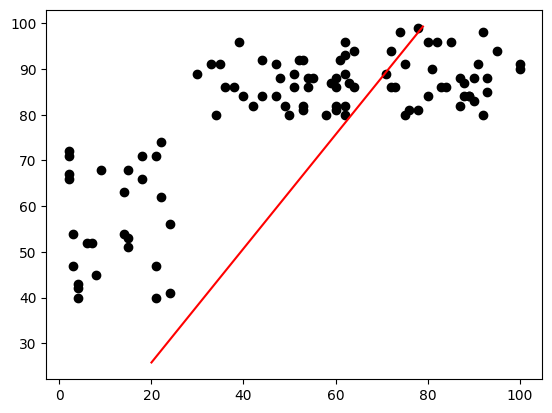

In [ ]:
def mean_squared_error(m, b, time, score): #Theoretical model
  total_error = 0
  for i in range (0, len(time)):
    x = time[i]
    y = score[i]
    total_error += (y - ((m * x) + b)) ** 2
  total_error = total_error / float(len(time))
  return total_error


def gradient_descent (m_now, b_now, l, time, score):
  m_gradient = 0
  b_gradient = 0
  n = 100

  for i in range(0,n):
    x = time[i]
    y = score[i]
    m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
    b_gradient += -(2/n) * (y - (m_now * x + b_now))

  m = m_now - m_gradient * l
  b = b_now - b_gradient * l

  return m, b

m = 0
b = 0
l = 0.0001
epochs = 300

for i in range(0, epochs):
  m, b = gradient_descent(m,b,l,Study_Time, Exam_Score)

print (m,b)

plt.scatter(Study_Time, Exam_Score, color = "black")
plt.plot(list(range(20,80)), [m*x + b for x in range(20,80)], color = "red")
plt.show()